Linear regression model--There are two models in this notebook. In the first model, it is targetted that total deviation from the best fitting line must be minimized. In the secon model, maxiumum deviation must be minimized.

In [8]:
import gurobipy as gb
import numpy as np
import matplotlib.pyplot as plt

In [9]:
n = 10000#number of observations
X = range(1,n+1)
Y = [np.random.normal(i,(i/5)) for i in range(1,n+1)]

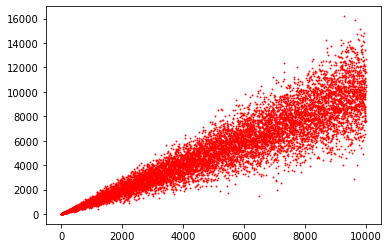

In [10]:
plt.scatter(X,Y,c = "red",s = 1,alpha = 0.8)

In [11]:
from gurobipy import Model, GRB, quicksum

In [12]:
mdl = Model("CF")

Using license file C:\Users\aakgul\gurobi.lic
Academic license - for non-commercial use only - expires 2021-04-19


In [13]:
slack = mdl.addVars(range(1,n+1),vtype = GRB.CONTINUOUS, name = "-deviation")
surplas = mdl.addVars(range(1,n+1),vtype = GRB.CONTINUOUS, name = "+deviation")
a = mdl.addVar(lb=-GRB.INFINITY, ub=GRB.INFINITY,vtype = GRB.CONTINUOUS, name = "constant")
b = mdl.addVar(lb=-GRB.INFINITY, ub=GRB.INFINITY,vtype = GRB.CONTINUOUS, name = "intersection")
z = mdl.addVar(vtype = GRB.CONTINUOUS, name = "max")#for min(max)
k = mdl.addVar(lb=-GRB.INFINITY, ub=GRB.INFINITY,vtype = GRB.CONTINUOUS, name = "constant")#for min(max)
m = mdl.addVar(lb=-GRB.INFINITY, ub=GRB.INFINITY,vtype = GRB.CONTINUOUS, name = "intersection")#for min(max)

In [14]:
mdl.setObjective(quicksum(surplas[i] + slack[i] for i in range(1,n+1)), GRB.MINIMIZE)

In [15]:
mdl.addConstrs((X[i-1]*a+b+slack[i]-surplas[i]) == Y[i-1] for i in range(1,n+1))

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>,
 22: <gurobi.Constr *Awaiting Model Update*

In [16]:
mdl.optimize()#first model. Minimize total deviation from best line fitting the model

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 10000 rows, 20005 columns and 40000 nonzeros
Model fingerprint: 0x075e26df
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+04]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 0 rows and 3 columns
Presolve time: 0.04s
Presolved: 10000 rows, 20002 columns, 40000 nonzeros

Ordering time: 0.00s

Barrier statistics:
 Dense cols : 2
 Free vars  : 2
 AA' NZ     : 2.000e+04
 Factor NZ  : 3.000e+04 (roughly 12 MBytes of memory)
 Factor Ops : 9.001e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.76647058e+08  0.00000000e+00  5.68e-14 0.00e+00  2.44e+0

In [17]:
a.x

0.9969536191192878

In [18]:
b.x

-0.1332306345808547

In [19]:
Ymean = sum(Y)/len(Y)

In [20]:
OFT = [(i-Ymean)**2 for i in Y]
HKT = [(i*a.x+b.x-j)**2 for i,j in zip(X,Y)]
RSquare = 1- (sum(HKT)/sum(OFT))
adjustedRSquare = 1-(1-RSquare)*(n-1)/(n-1-1)
print(RSquare)
print(adjustedRSquare)
liste = [i*a.x+b.x for i in X]

0.8603127068230363
0.8602987352994138


In [21]:
mdl.setObjective(z, GRB.MINIMIZE)#second model. Minimize maximum deviation

In [22]:
mdl.addConstrs(slack[i] <= z for i in range(1,n+1))
mdl.addConstrs(surplas[i] <= z for i in range(1,n+1))
mdl.addConstrs((X[i-1]*k+m+slack[i]-surplas[i]) == Y[i-1] for i in range(1,n+1))

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>,
 22: <gurobi.Constr *Awaiting Model Update*

In [23]:
mdl.optimize()#for second model

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 40000 rows, 20005 columns and 120000 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+04]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0      handle free variables                          0s
    4295    6.7501532e+03   0.000000e+00   0.000000e+00      2s

Solved in 4295 iterations and 2.33 seconds
Optimal objective  6.750153250e+03


In [24]:
k.x

0.44744148036926856

In [25]:
m.x

5293.888224332872

In [26]:
HKTminmax = [(i*k.x+m.x-j)**2 for i,j in zip(X,Y)]
RSquareminmax = 1-(sum(HKTminmax)/sum(OFT))
adjustedRSquare = 1-(1-RSquareminmax)*(n-1)/(n-1-1)
print(RSquareminmax)
print(adjustedRSquare)

-0.05697248062033533
-0.05707819901207567


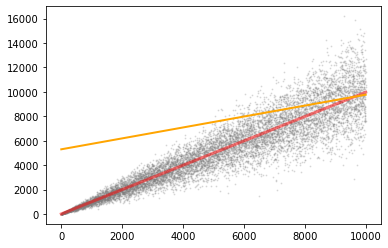

In [27]:
plt.scatter(X,Y,c = "grey",s = 1,alpha = 0.2)
plt.plot(X, liste, c = "r", linewidth = 3, alpha = 0.5)
plt.plot(X, [i*k.x+m.x for i in X], c = "orange", linewidth = 2)
plt.show()